# Test Train Split and Cross Validation

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Train your model on the the **training** data
- Score and plot your predictions for the **test** data (i.e., a scatter plot of actual y values versus predicted y values)
- How well did your model do?

In [8]:
X=df[['CRIM','ZN','INDUS']]
y = pd.DataFrame(boston.target)

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(253, 3) (253, 3) (253, 1) (253, 1)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.264338332021


In [24]:
print(lr.score(X_test, y_test))

0.324979398964


In [56]:
predictions=pd.DataFrame(lr.predict(X_test))

In [57]:
# from sklearn import datasets, linear_model
# import statsmodels.api as sm
# lm = linear_model.LinearRegression()
# model = lm.fit(X_test, y_test)
# predictions=model.predict(X_test)

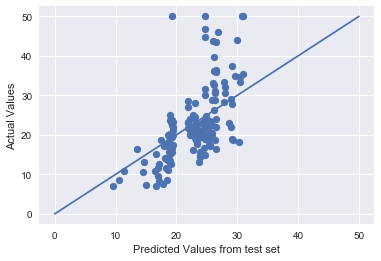

In [58]:
plt.scatter(predictions,y_test)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)])
plt.xlabel("Predicted Values from test set")
plt.ylabel("Actual Values")
plt.show()

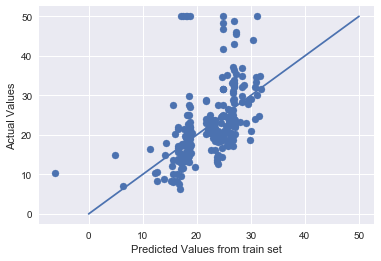

In [43]:
plt.scatter(lr.predict(X_train),y_train)
plt.plot([0, np.max(y_train)], [0, np.max(y_train)])
plt.xlabel("Predicted Values from train set")
plt.ylabel("Actual Values")
plt.show()

### 3. Try ratios of 70/30 and 90/10 for the training set to test set

- Score and plot your test set (i.e., a scatter plot of actual y values versus predicted y values)
- How does the score change across both of them?

(354, 3) (152, 3) (354, 1) (152, 1)
0.304036942719
0.228043953785


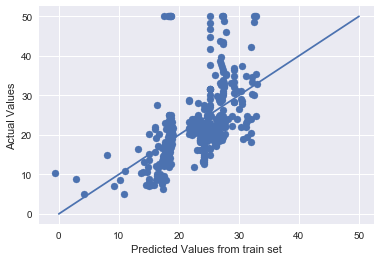

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
plt.scatter(lr.predict(X_train),y_train)
plt.plot([0, np.max(y_train)], [0, np.max(y_train)])
plt.xlabel("Predicted Values from train set")
plt.ylabel("Actual Values")
plt.show()

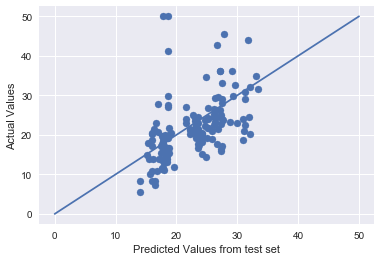

In [60]:
plt.scatter(lr.predict(X_test),y_test)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)])
plt.xlabel("Predicted Values from test set")
plt.ylabel("Actual Values")
plt.show()

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

(455, 3) (51, 3) (455, 1) (51, 1)
0.292561428513
0.28893088637


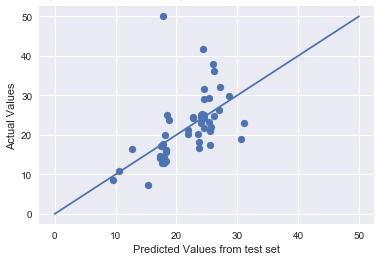

In [62]:
plt.scatter(lr.predict(X_test),y_test)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)])
plt.xlabel("Predicted Values from test set")
plt.ylabel("Actual Values")
plt.show()

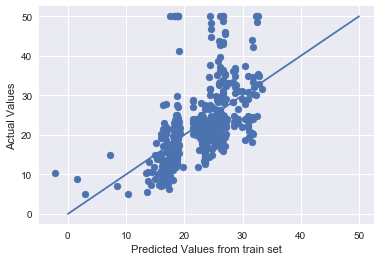

In [63]:
plt.scatter(lr.predict(X_train),y_train)
plt.plot([0, np.max(y_train)], [0, np.max(y_train)])
plt.xlabel("Predicted Values from train set")
plt.ylabel("Actual Values")
plt.show()

### 4. Try K-Folds cross-validation with _k_ between 5-10 for your regression. 

You can use either `cross_val_score` / `cross_val_predict` or the `KFolds` iterator

- What set of variables are optimal? 
- How do your scores change?  
- How does the variance of the scores change?
- Try different folds to get a sense of how this impacts your score.

In [99]:
X = df[['CRIM', 'ZN', 'INDUS']].copy()
from sklearn.model_selection import cross_val_score, cross_val_predict
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=6))

[-0.59962643 -0.1142814  -0.192132    0.09916956 -0.07111296 -0.07818871]


In [138]:
from sklearn.metrics import mean_squared_error
predictions=cross_val_predict(lr, X, y, cv=6)
mean_squared_error(y, predictions)

69.311669374520022

In [139]:
lr = LinearRegression()
lr.fit(X, y)
predict=lr.predict(X)
mean_squared_error(y,predict)

59.689498906889824

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using train/test split and K-Folds? Set up a scheme to do the following:

1. Create a holdout test set using `train_test_split()`. 
  - We will use the training set in our cross-validation part below to find the right set of columns.
  - We will check the best set of columns that we have found against the holdout test as a final check on our work
2. Iterate through every pair of columns (use a for loop!) in the training set you created in step 1 and look at the average $R^2$ score found by `cross_val_score()`
3. Pick the pair of columns that has the highest cross-validated $R^2$ code and fit a Linear Regression using those columns as the predictors in the full training set you created in step 1.
4. Test this "final" model against the holdout test set you created in step 1. How well does it perform?

### 5.1 Can you explain what could be wrong with this approach?

### 6. [Bonus] Explore another target variable 

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

> *Tip: Check out pairplots, coefficients, and pearson scores.*